# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

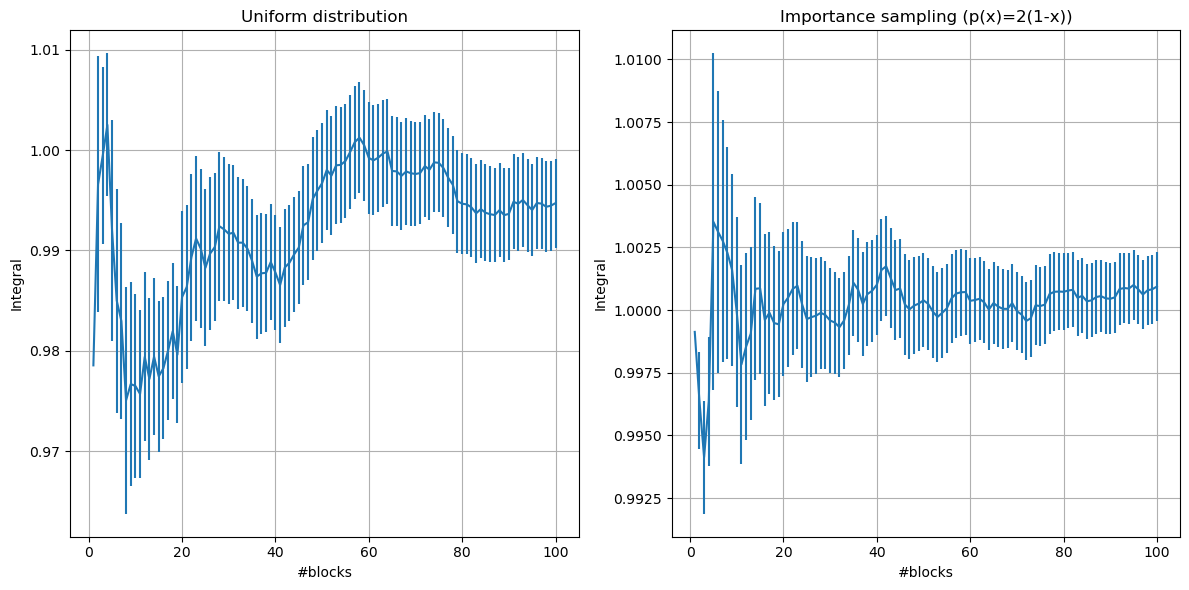

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dai file
data_unif = np.loadtxt('Integral_unif_out.txt')
data_importance = np.loadtxt('Integral_importance_out.txt')

# Estrai le colonne
x_unif, y_unif, err_unif = data_unif[:, 0], data_unif[:, 1], data_unif[:, 2]
x_importance, y_importance, err_importance = data_importance[:, 0], data_importance[:, 1], data_importance[:, 2]

# Crea due grafici affiancati
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per la distribuzione uniforme
axs[0].errorbar(x_unif, y_unif, yerr=err_unif)
axs[0].set_title('Uniform distribution')
axs[0].set_xlabel('#blocks')
axs[0].set_ylabel('Integral')
axs[0].grid(True)

# Grafico per l'importance sampling
axs[1].errorbar(x_importance, y_importance, yerr=err_importance)
axs[1].set_title('Importance sampling (p(x)=2(1-x))')
axs[1].set_xlabel('#blocks')
axs[1].set_ylabel('Integral')
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [1]:
#ESEGUO I FIT
from scipy.odr import *

def sqrt_fit(p, x, yerr):
    
    def sqrt(p, x):
        k = p
        return k * np.sqrt(x)
    
    model = Model(sqrt)
    data_for_odr = RealData(x, p, sy=yerr)
    odr = ODR(data_for_odr, model, beta0=[1])
    regr = odr.run()
    x_fit = np.linspace(x[0], x[-1], 1000)
    y_fit = regr.beta[0] * np.sqrt(x_fit)
    return x_fit, y_fit
        

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/aureliocaslini/anaconda3/lib/python3.11/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)


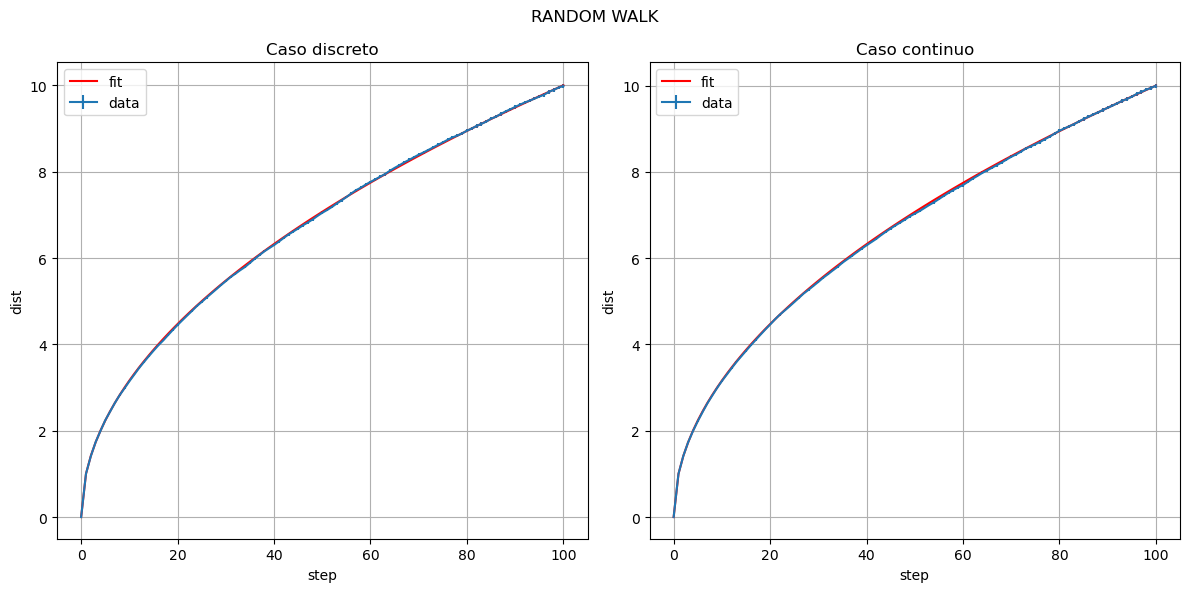

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dai file
data_unif = np.loadtxt('Discreto_out.txt')
data_importance = np.loadtxt('Continuo_out.txt')

# Estrai le colonne
x_unif, y_unif, err_unif = data_unif[:, 0], data_unif[:, 1], data_unif[:, 2]
x_importance, y_importance, err_importance = data_importance[:, 0], data_importance[:, 1], data_importance[:, 2]

# Crea due grafici affiancati
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per la distribuzione uniforme
axs[0].errorbar(x_unif, y_unif, yerr=err_unif, label = 'data')
x_fit, y_fit = sqrt_fit(y_unif, x_unif, err_unif)
axs[0].plot(x_fit, y_fit, label='fit', color = 'red')
axs[0].set_title('Caso discreto')
axs[0].set_xlabel('step')
axs[0].set_ylabel('dist')
axs[0].grid(True)
axs[0].legend()

# Grafico per l'importance sampling
axs[1].errorbar(x_importance, y_importance, yerr=err_importance, label = 'data')
x_fit_c, y_fit_c = sqrt_fit(y_importance, x_importance, err_importance)
axs[1].plot(x_fit_c, y_fit_c, label='fit', color = 'red')
axs[1].set_title('Caso continuo')
axs[1].set_xlabel('step')
axs[1].set_ylabel('dist')
axs[1].grid(True)
axs[1].legend()

plt.suptitle('RANDOM WALK')
plt.tight_layout()
plt.show()